In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 90s 8us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [5]:
image=x_train[0]

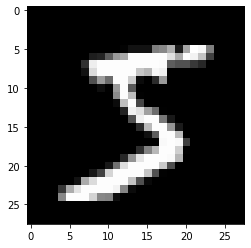

In [7]:
plt.imshow(image,cmap='gray')

In [8]:
#actual labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from keras.utils.np_utils import to_categorical

In [11]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
image.max()

255

In [13]:
#need to normalize
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

In [15]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train=x_train.reshape(60000,28,28,1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)

In [23]:
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [25]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [29]:
model=Sequential()
#layers
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten()) #makes 2d to 1d
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 36s 604us/step - loss: 0.1475 - accuracy: 0.9556
Epoch 2/2
60000/60000 [==============================] - 34s 568us/step - loss: 0.0513 - accuracy: 0.9846


In [32]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 150us/step


[0.049058095491072165, 0.9839000105857849]

In [33]:
from sklearn.metrics import classification_report

In [34]:
predictions=model.predict_classes(x_test)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [36]:
model.save('fiorst.h5')

In [69]:
from keras.preprocessing import image
img = image.load_img('/home/deepanshu/Documents/cv_course/index.png' , target_size=(28,28))
img  = image.img_to_array(img)
print(img.shape)
img  = img/255
print(img.shape)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)

(28, 28, 3)
(28, 28, 3)
(28, 28)


In [71]:
gray=gray.reshape(1,28,28,1)
img_class=model.predict_classes(gray) 
# this model above was already trained 
# code from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-#neural-networks-python-keras/


In [72]:
img_class

array([5])